In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!rm -rf drive/data/tb_logs

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
LOG_DIR = '/content/gdrive/My Drive/Colab Notebooks/logs'

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

import os
if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)

get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-04-09 07:34:02--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.206.130.40, 52.54.84.112, 52.73.9.93, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.206.130.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14977695 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  14.28M  18.4MB/s    in 0.8s    

2019-04-09 07:34:03 (18.4 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [14977695/14977695]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
https://29e3d6f4.ngrok.io


In [0]:
trainX = np.linspace(-1,1,101)
trainY = 3 * trainX + np.random.randn(*trainX.shape) * 0.33

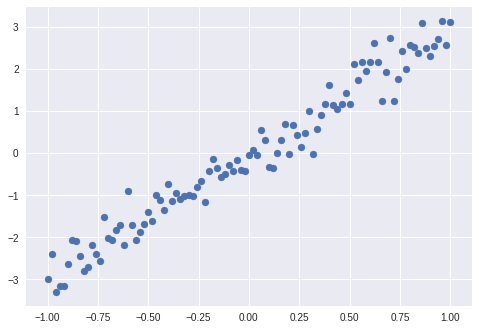

In [17]:
plt.scatter(trainX,trainY)
plt.show()

In [0]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [0]:
w = tf.Variable(0.0,name='weights')
init =tf.global_variables_initializer()

In [20]:
tf.__version__

'1.13.1'

In [0]:
y_mode = tf.multiply(X,w)
cost = (tf.pow(Y-y_mode,2))

In [0]:
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [0]:
sess = tf.Session()
sess.run(init)
for i in range(100):
  for(x,y)in zip(trainX,trainY):
    sess.run(train_op,feed_dict ={X:x,Y:y})

In [24]:
print(sess.run(w))

2.9351292


In [0]:
writer = tf.summary.FileWriter('/content/gdrive/My Drive/Colab Notebooks/logs',sess.graph)